<a href="https://colab.research.google.com/github/maxbshaw17/Date_Science_Final/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Whether a University Student Will Drop Out Or Not

## The Machine Learning Aspect of Max Bradshaw and Jake Dorick's Data Science Final Project

In [51]:
from ast import increment_lineno
# Import pandas and the dropout dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab import files
uploaded = files.upload()

Saving dropout_dataset.csv to dropout_dataset (1).csv


In [ ]:
import io
df = io.BytesIO(uploaded['dropout_dataset.csv'])

In [66]:
df = pd.read_csv('dropout_dataset.csv')

In [67]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [68]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

## Automated Exploratory Data Analysis

In [69]:
# Install the sweetviz package for automated exploratory data analysis
!pip install sweetviz

In [ ]:
# Create the automated EDA report as a html file in user's browser
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('automated_EDA.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

Report automated_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Supervised Machine Learning — Decision Trees

In [70]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Drop the answer (the Target column in this dataset's case)
X = df.drop('Target', axis = 1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=500)

In [71]:
# Train the decision tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [72]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = dtree.predict(X_test)
# Print the classification report of the decision tree model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

     Dropout       0.65      0.67      0.66       275
    Enrolled       0.38      0.43      0.40       168
    Graduate       0.79      0.74      0.76       442

    accuracy                           0.66       885
   macro avg       0.61      0.61      0.61       885
weighted avg       0.67      0.66      0.66       885



In [73]:
# Let's see the confusion matrix now...
cm = confusion_matrix(y_test,predictions)
print(confusion_matrix(y_test,predictions))

[[183  54  38]
 [ 48  72  48]
 [ 52  64 326]]


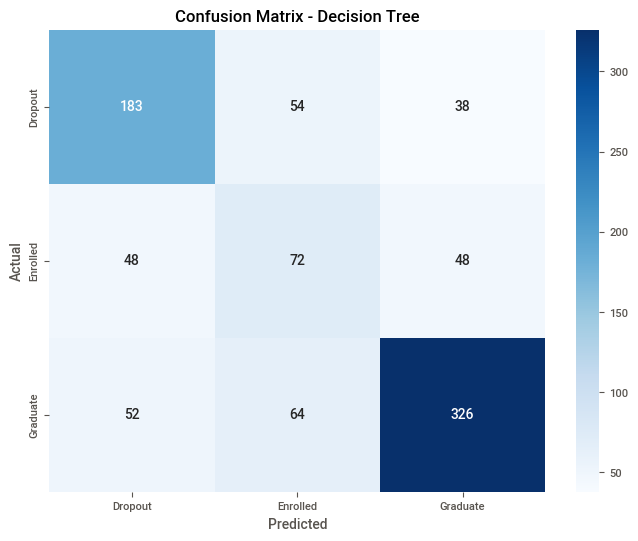

In [80]:
# Visual representation of the confusion matrix using seaborn
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Enrolled', 'Graduate'], yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [74]:
# Calculate accuracy using sklearn.metric's function
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, predictions)
print(dt_accuracy)

0.656497175141243


Not great...

### Supervised Machine Learning — Artificial Neural Network

In [ ]:
# Resetting these variables to avoid any mixups that may occur in previous code
X = df.drop('Target', axis = 1)
y = df['Target']

In [ ]:
# Convert the target labels from words to numbers using label_encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Scaling the columns

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Import the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
classifier = Sequential()

### Creating the Layers

In [ ]:
# First hidden layer
classifier.add(Dense(activation="relu", input_dim=34, units=6, kernel_initializer="uniform"))
# Second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

In [ ]:
# Output layer
# SoftMax function will be used since the dependent variable has more than 2 categories
# The Target column is either Dropout, Graduate, or Enrolled (3 categories)
classifier.add(Dense(activation="softmax", units=3, kernel_initializer="uniform"))

In [ ]:
# Compiling
# Used categorical crossentropy (rather than binary crossentropy) since there are three categories of analysis
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
354/354 [==============================] - 3s 4ms/step - loss: 0.8807 - accuracy: 0.6604
Epoch 2/10
354/354 [==============================] - 1s 2ms/step - loss: 0.6508 - accuracy: 0.7321
Epoch 3/10
354/354 [==============================] - 1s 2ms/step - loss: 0.6159 - accuracy: 0.7448
Epoch 4/10
354/354 [==============================] - 1s 3ms/step - loss: 0.6019 - accuracy: 0.7528
Epoch 5/10
354/354 [==============================] - 1s 2ms/step - loss: 0.5925 - accuracy: 0.7545
Epoch 6/10
354/354 [==============================] - 1s 2ms/step - loss: 0.5833 - accuracy: 0.7635
Epoch 7/10
354/354 [==============================] - 1s 2ms/step - loss: 0.5754 - accuracy: 0.7669
Epoch 8/10
354/354 [==============================] - 1s 2ms/step - loss: 0.5682 - accuracy: 0.7742
Epoch 9/10
354/354 [==============================] - 1s 2ms/step - loss: 0.5631 - accuracy: 0.7779
Epoch 10/10
354/354 [==============================] - 1s 2ms/step - loss: 0.5579 - accuracy: 0.7804

In [ ]:
# Predicting the test results
y_pred = classifier.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

28/28 [==============================] - 0s 2ms/step


In [ ]:
# Have to change the values back into words
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_classes)

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test_original, y_pred_original)
print(cm)

[[228  26  30]
 [ 41  64  46]
 [ 21  22 407]]


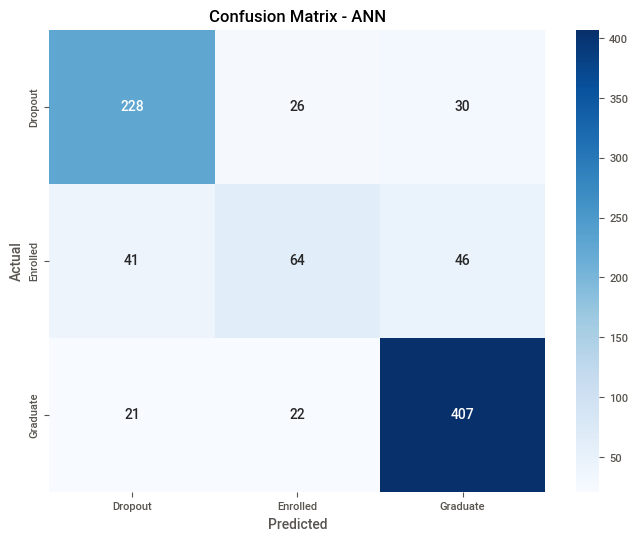

In [ ]:
# Visual representation of the confusion matrix using seaborn
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN')
plt.show()

In [ ]:
ann_accuracy = accuracy_score(y_test_original, y_pred_original)
print(ann_accuracy)

0.7898305084745763


Better.

## Redoing the Artificial Neural Network **Without** the Enrolled Category

In [ ]:
df2 = df[df['Target'] != 'Enrolled']
df2

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
X = df2.drop('Target', axis = 1)
y = df2['Target']

In [ ]:
# Back to numerical representation
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = Sequential()

In [ ]:
# First hidden layer
classifier.add(Dense(activation="relu", input_dim=34, units=6, kernel_initializer="uniform"))
# Second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

In [ ]:
# Two units instead of three now
classifier.add(Dense(activation="softmax", units=2, kernel_initializer="uniform"))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Instead of Normally Fitting the Classifier, Let's Make it into a Graph

291/291 [==============================] - 1s 3ms/step - loss: 0.2169 - accuracy: 0.9198


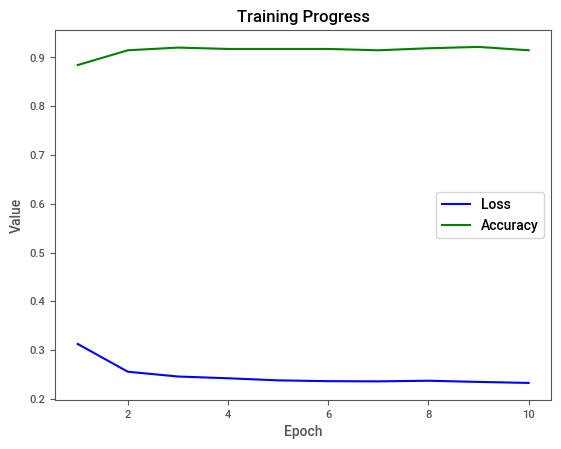

In [ ]:
# The function update_graph will update the graph with each additional epoch
def update_graph(epoch, losses, accuracies):
    plt.cla()  # Clear the current axes
    plt.plot(range(1, epoch + 1), losses, label='Loss', color='blue')
    plt.plot(range(1, epoch + 1), accuracies, label='Accuracy', color='green')
    plt.title('Training Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()

# Create a list for the loss and accuracy values for each epoch
losses = []
accuracies = []

for epoch in range(1, 11):  # Assuming 10 epochs
    # The actual fitting
    classifier.fit(X_train, y_train, batch_size=10, epochs=1)

    # Obtaining the loss and accuracy for the current epoch
    loss_value, accuracy_value = classifier.evaluate(X_test, y_test, verbose=0)

    # Appending values to the lists
    losses.append(loss_value)
    accuracies.append(accuracy_value)

    # Updating the graph
    update_graph(epoch, losses, accuracies)

# Displaying the  graph
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

23/23 [==============================] - 0s 2ms/step


In [ ]:
# Back to words
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_classes)

In [ ]:
cm = confusion_matrix(y_test_original, y_pred_original)
print(cm)

[[254  42]
 [ 20 410]]


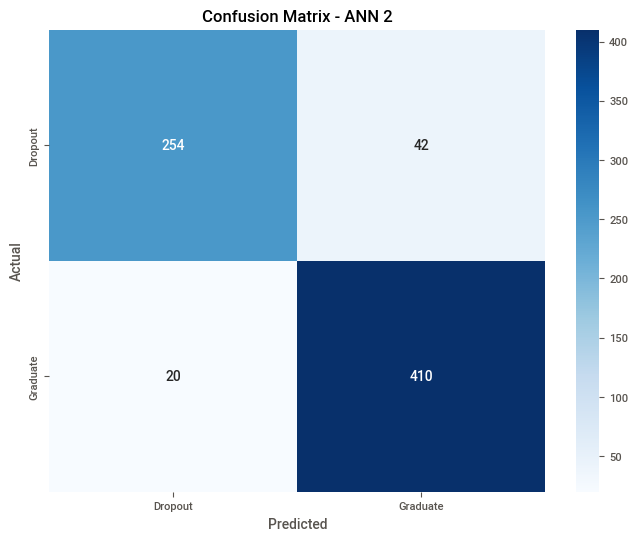

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN 2')
plt.show()

In [ ]:
ann2_accuracy = accuracy_score(y_test_original, y_pred_original)
print(ann2_accuracy)

0.9146005509641874


Wow!

## Visualize

In [ ]:
# Install visualization packages
!pip install ann_visualizer
!pip install graphviz
!pip install visualkeras

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=a9cb81b831bf82afa534ee6e1ab582641ce8c410a051ef8195ce29659ac30421
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 6.2 MB/s eta 0:00:00


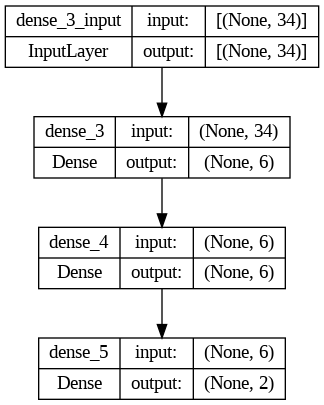

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, to_file='network.png', show_shapes=True, show_layer_names=True)

# New Machine Learning Technique — Hidden Markov Model — Generative Model

In [ ]:
# Install and import the package hmm(Hidden Markov Model)learn
!pip install hmmlearn
from hmmlearn import hmm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 1.2 MB/s eta 0:00:00


In [ ]:
# Reset these variables one more time (Using the dataframe that only consists of graduates and dropouts)
X = df2.drop('Target', axis=1)
y = df2['Target']

In [ ]:
# Back to numbers (again)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Define and train the Hidden Markov Model
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100, algorithm = 'map')
model.fit(X_train)

GaussianHMM(algorithm='map', covariance_type='full', n_components=2, n_iter=100)

In [ ]:
y_pred = model.predict(X_test)
# Back to words (again)
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

In [ ]:
hmm_accuracy = accuracy_score(y_test_original, y_pred_original)
print(hmm_accuracy)

0.7369146005509641


In [ ]:
cm = confusion_matrix(y_test_original, y_pred_original)
print(cm)

[[162 134]
 [ 57 373]]


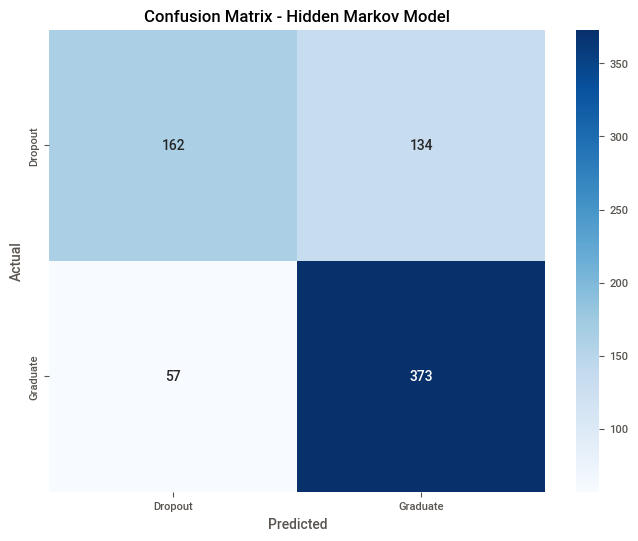

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Hidden Markov Model')
plt.show()

Oh boy...

### The dataframe is not a system that changes between states within specific probabilities; therefore, the use of a Hidden Markov Model is likely not useful...

## Complete Accuracies Across ML Techniques

<ipython-input-55-093b93502aaa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


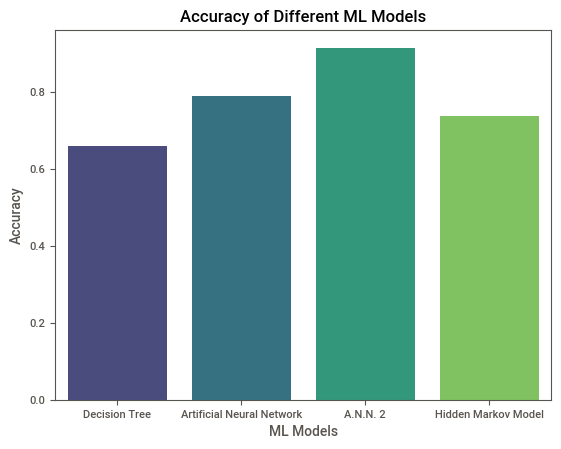

In [ ]:
# Define model names and their accuracies
model_names = ['Decision Tree', 'Artificial Neural Network', 'A.N.N. 2', 'Hidden Markov Model']
accuracies = [dt_accuracy, ann_accuracy, ann2_accuracy, hmm_accuracy]

# Create a bar chart using Seaborn
sns.barplot(x=model_names, y=accuracies, palette='viridis')

# Add labels and title
plt.xlabel('ML Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different ML Models')

# Show the plot
plt.show()